In [1]:
#enveloping potential
# simple Example plot Enveloped Potential with two Harmonic Oscilators
##Imports:
###If not installed:
import os, sys
sys.path.append(os.getcwd()+"/../../..")

import numpy as np
import ensembler.potentials.TwoD as pot2D
import ensembler.potentials.ND as potND

import ensembler.visualisation.plotPotentials as exPlot

point_resolution = 250 # if you want to save time use: 120
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# BUILD POTENTIAL

Here we define the two states, we want to use during our simulations.

In [2]:
# Settings
barrier = 50 #kT - minimal barrier in system
amplitude = barrier/2
shift  = 0.5*np.pi 

#System States
V1 = pot2D.wavePotential(phase_shift=(shift,shift), multiplicity=(2.0, 2.0), amplitude=(amplitude, amplitude), radians=True)
V2 = pot2D.wavePotential(phase_shift=(0.0, 0.0), multiplicity=(2.0, 2.0), amplitude=(amplitude, amplitude), radians=True)



C:\Users\benja\OneDrive - ETH Zürich\PhD\Code\ensembler_public\examples\publication\publication_lambda_EDS/../../..\ensembler\visualisation\plotPotentials.py:614: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


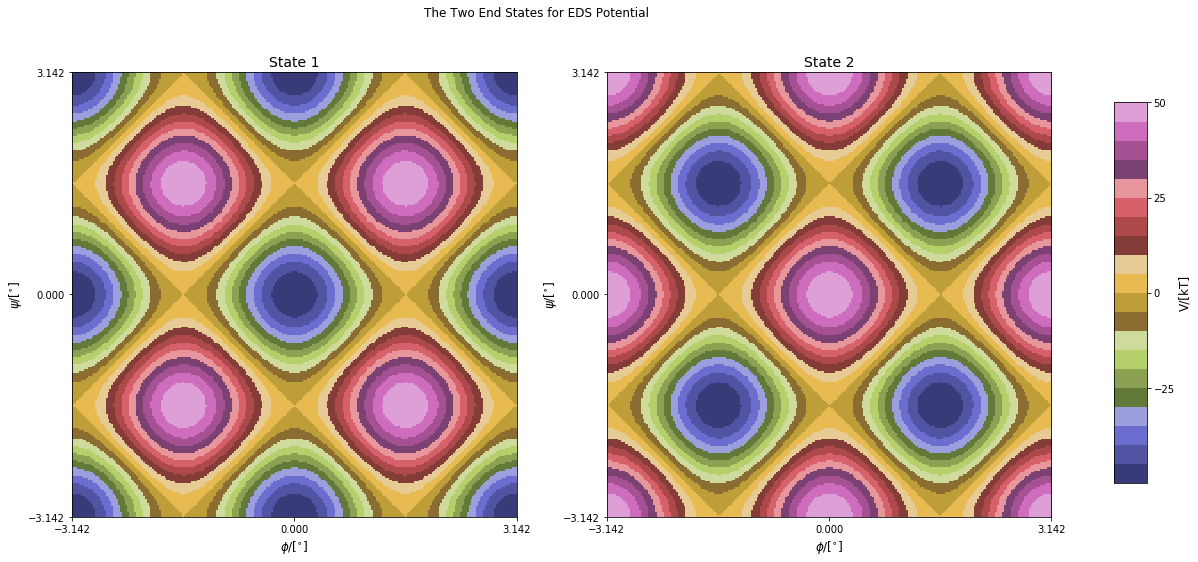

In [3]:
#Visualisation
fig = exPlot.plot_2D_2states(V1, V2, space_range=[(-np.pi, np.pi), (-np.pi,np.pi)], point_resolution=point_resolution)

Next we are going to couple them in an EDS potential.

In [4]:
Eoff = [0,0]
s= 1.0
edsPot = potND.envelopedPotential(V_is=[V1, V2], s=s, eoff=Eoff)
print(edsPot)


envelopedPotential
	States: 2
	Dimensions: nDimensions

	Functional:
 		V:	-T*kb*log(Sum(exp(-Matrix([
[s_0*(-Eoff_0 + state_0)],
[s_1*(-Eoff_1 + state_1)]])[i, 0]/(T*kb)), (i, 0, N - 1)))/s_i
		dVdpos:	0

	Simplified Function
		V:	-log(Sum(exp(-Matrix([
[1.0*Sum(Matrix([
[25.0*cos(2.0*r_0 + 3.14159265358979)],
[25.0*cos(2.0*r_1 + 3.14159265358979)]])[i, 0], (i, 0, 1))],
[                                      1.0*Sum(Matrix([
[25.0*cos(2.0*r_0)],
[25.0*cos(2.0*r_1)]])[i, 0], (i, 0, 1))]])[i, 0]), (i, 0, 1)))/s_i
		dVdpos:	0

	Constants: 
		amp_0: 			25.0
		amp_1: 			25.0
		mult_0: 			2.0
		mult_1: 			2.0
		yOff_0: 			0
		yOff_1: 			0
		phase_0: 			0.0
		phase_1: 			0.0
		nDimensions: 			2
		nStates: 			1
		k_0: 			1.0
		k_1: 			1.0
		r_shift0: 			0.0
		r_shift1: 			0.0
		V_off_0: 			0.0
		V_off_1: 			0.0
		A_gauss: 			1.0
		mu_0: 			0.0
		mu_1: 			0.0
		sigma_0: 			1.0
		sigma_1: 			1.0
		T: 			1
		kb: 			1
		N: 			2
		s_0: 			1.0
		s_1: 			1.0
		Eoff_0: 			0
		Eoff_1: 			0
		nDimensio

-3.141592653589793 3.141592653589793 -3.141592653589793 3.141592653589793


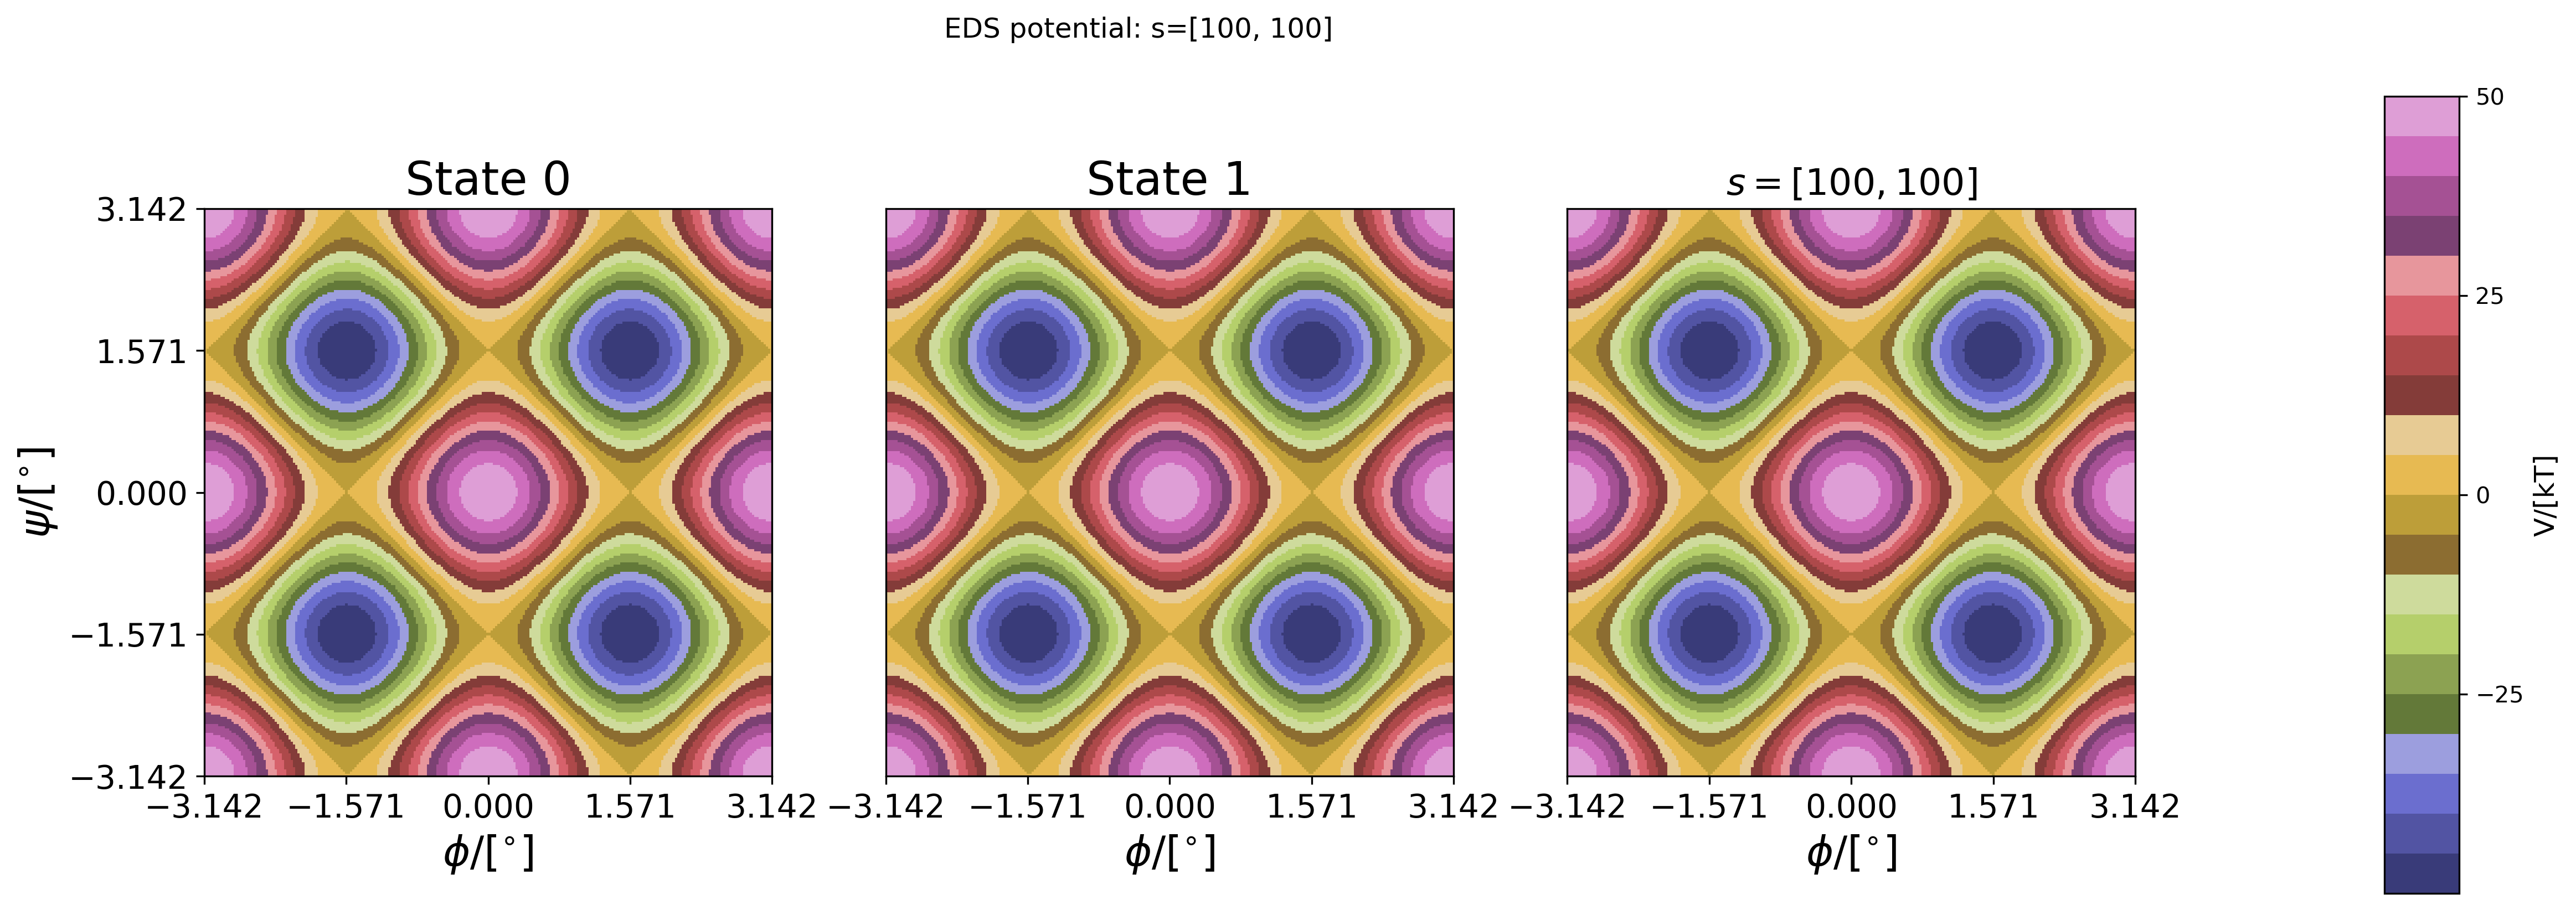

In [5]:
fig = exPlot.plot_2D_2State_EDS_potential(eds_pot=edsPot,  point_resolution=point_resolution)

In this plot we show, the s dependency.

-3.141592653589793 3.141592653589793 -3.141592653589793 3.141592653589793


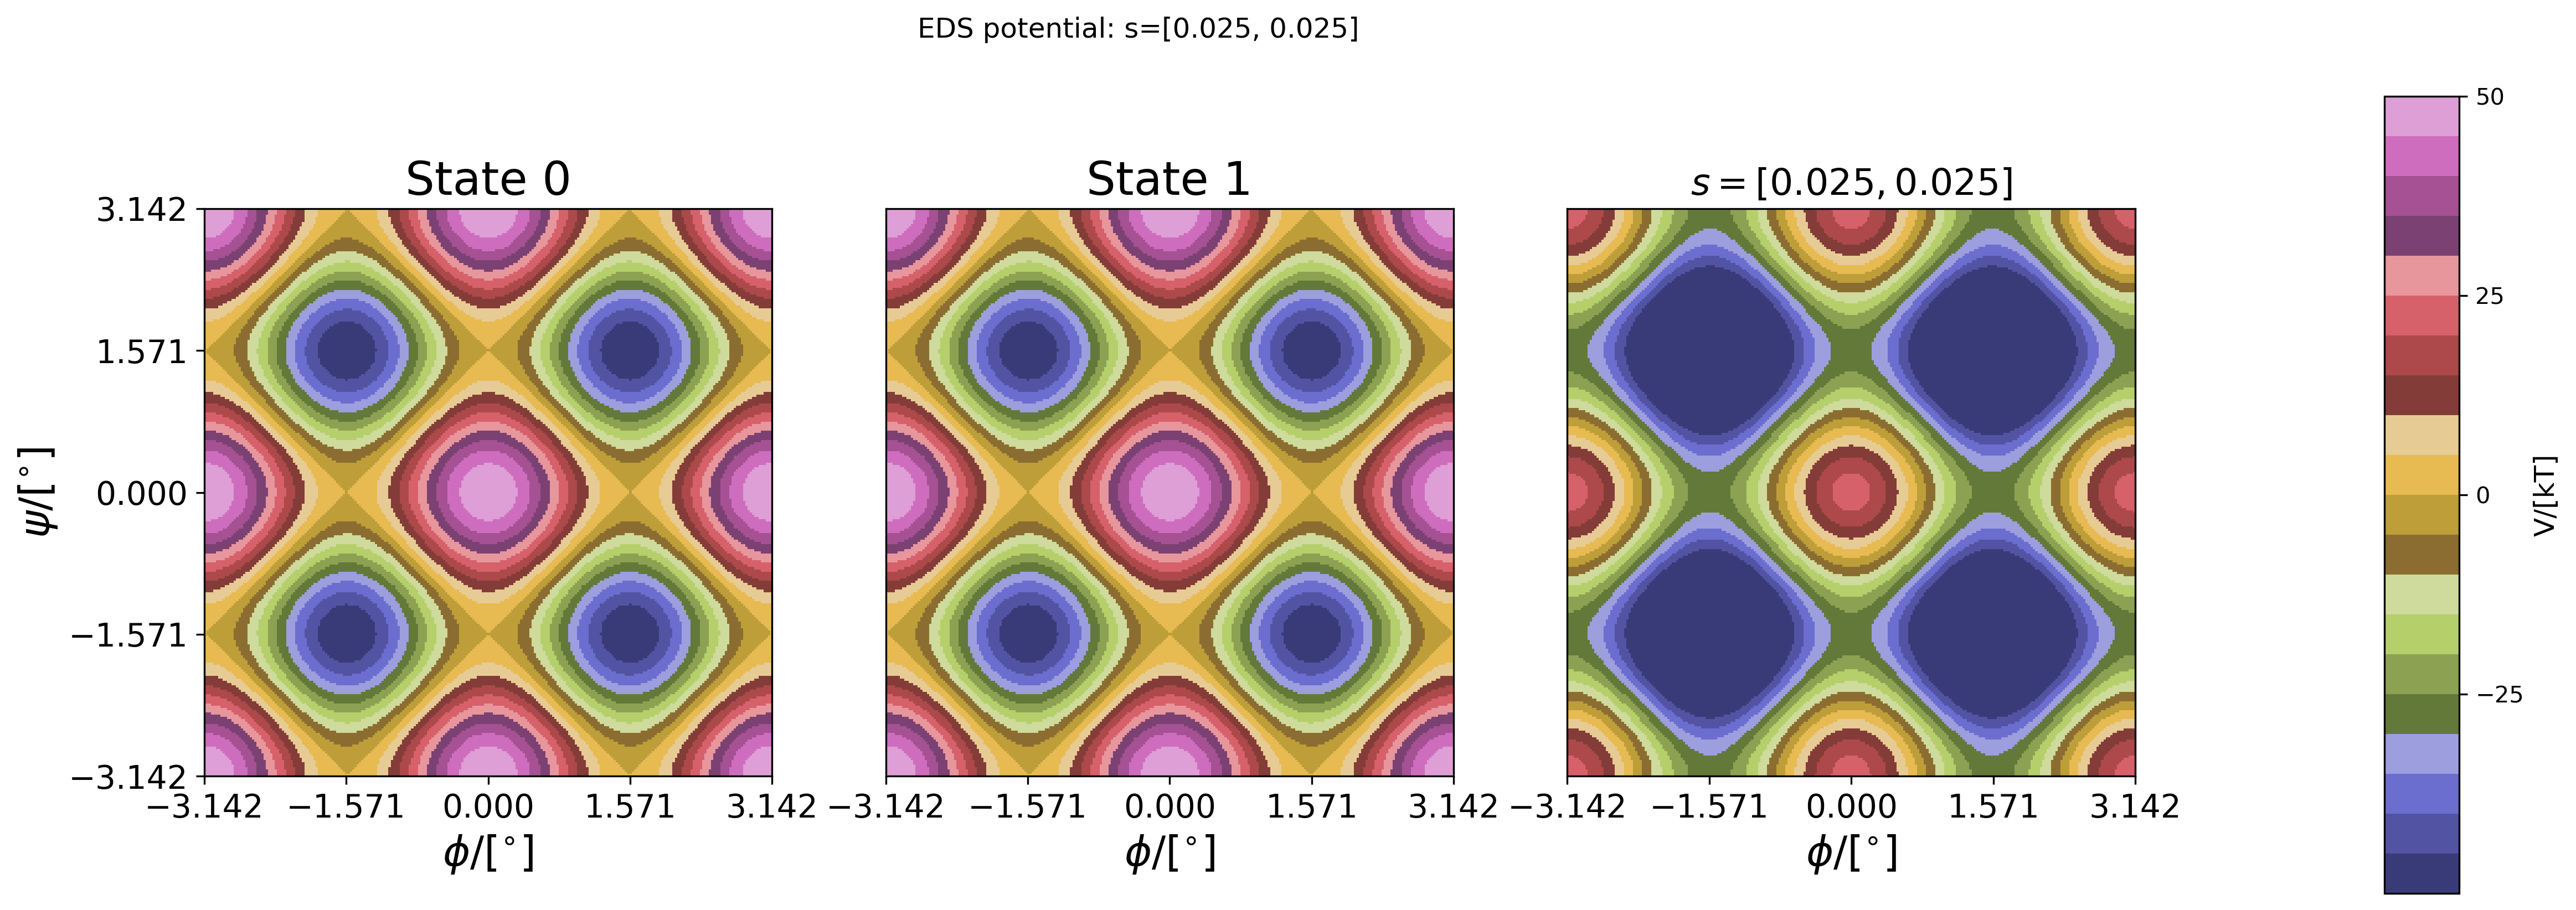

In [6]:
fig = exPlot.plot_2D_2State_EDS_potential(eds_pot=edsPot, s=0.025, point_resolution=point_resolution)

# smoothing parameter dependency
Next we want to show how  the EDS Potentials are behaving on changing the smoothing parameter s.

49.93068528194401
49.80713767930998
49.46350837417961
48.50614831775874
45.84941808047936
38.44754699066758
18.493309974547937
-36.643397569993155
-181.0490601866484
-643.1471805599452


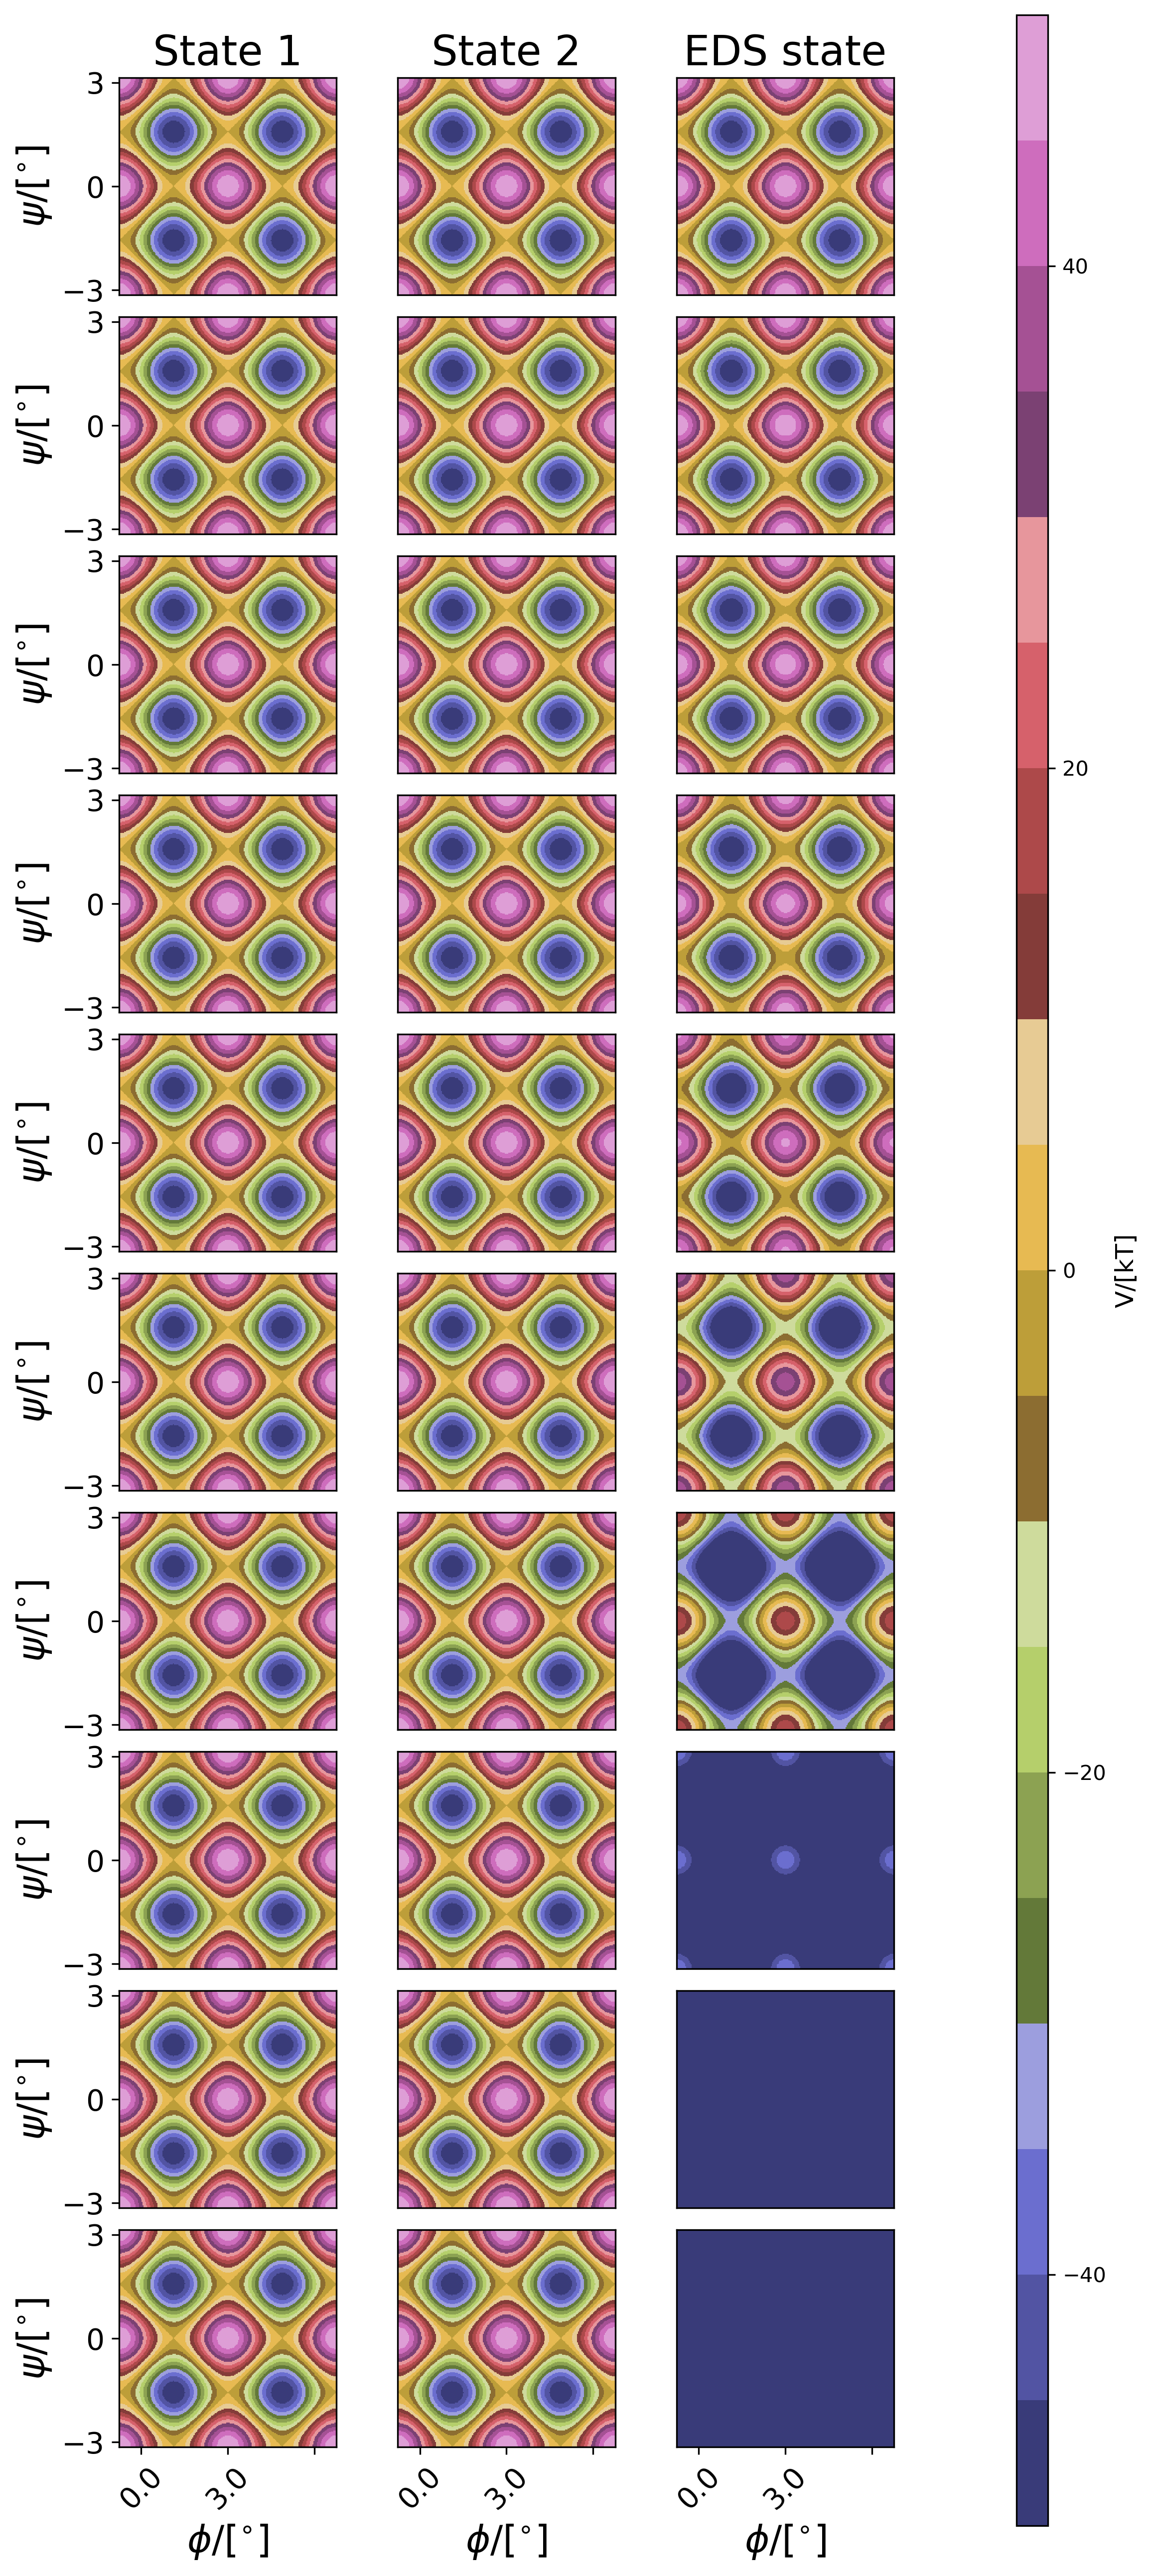

In [7]:
s_values = {np.round(s,3):[] for s in np.logspace(1,-3, 10)}
fig = exPlot.plot_2D_2State_EDS_potential_sDependency(sVal_traj_Dict=s_values, eds_pot=edsPot, point_resolution=point_resolution)
